# Predictive Modeling 

We have to predict the math score of a student based on other variables such as gender, race/ethnicity, parental level of education, lunch, and test preparation course.

Step-1 Data Pre-Processing

In [1]:
# importing libraries  
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import warnings
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression

In [2]:
# importing datasets  
df= pd.read_csv('StudentsPerformance.csv')  
warnings.filterwarnings('ignore')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [3]:
# Separate categorical columns:
categorical_col=df.select_dtypes(include='object').columns
categorical_col

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')

In [4]:
# before starting EDA we have to see unique values
for i in categorical_col:
    print(df[i].unique())

['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['standard' 'free/reduced']
['none' 'completed']


In [5]:
# check missing values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

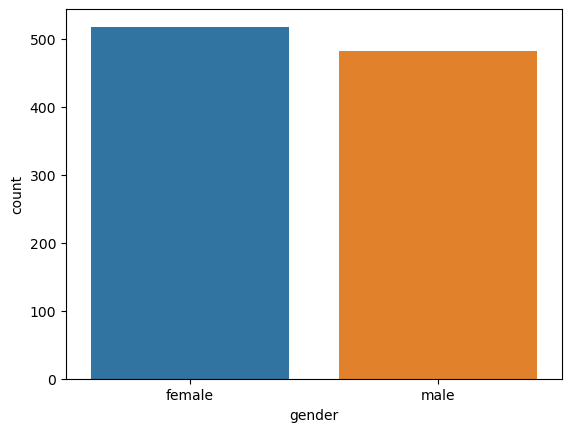

In [6]:
#check the gender column  is balance or not?
import seaborn as sns
sns.countplot(df['gender'])

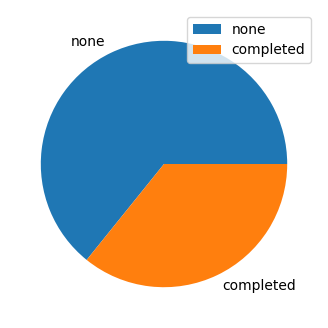

In [7]:
#How many of the students take course
count_test=df['test preparation course'].value_counts()
labels=df['test preparation course'].value_counts().index
plt.figure(figsize=(4,4))
plt.pie(count_test,labels=labels)
plt.legend(labels)
plt.show()

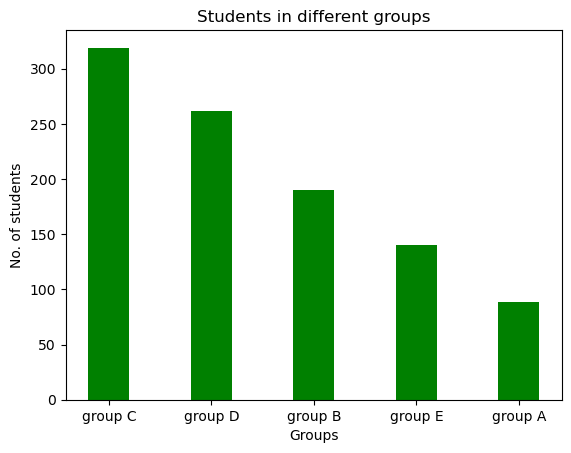

In [9]:
#No. of students in each group
plt.bar(df['race/ethnicity'].value_counts().index, df['race/ethnicity'].value_counts(), color ='blue',
        width = 0.4)
 
plt.xlabel("Groups")
plt.ylabel("No. of students")
plt.title("Students in different groups")
plt.show()

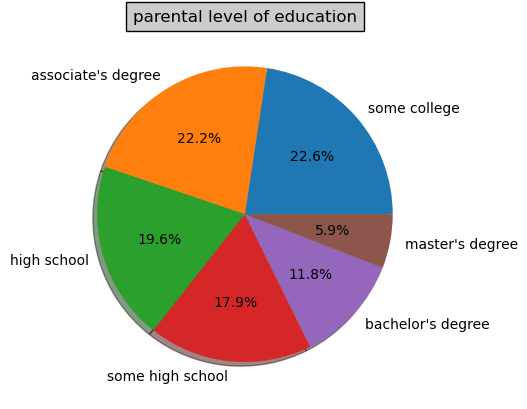

In [10]:
#Parental education
plt.pie(df['parental level of education'].value_counts(),labels=df['parental level of education'].value_counts().index,shadow = True,autopct='%1.1f%%')
plt.title("parental level of education", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

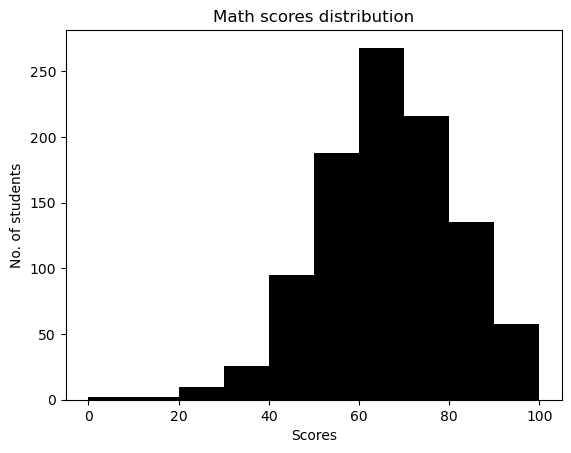

In [12]:
#scores distribution visualization by histogram
plt.hist(df['math score'],color='black')
plt.xlabel('Scores')
plt.ylabel('No. of students')
plt.title('Math scores distribution')
plt.show()

In [ ]:
#convert all string values into integer
gender={
    'male':1,
    'female':0
}
df['gender']=df['gender'].map(gender)

race={
    'group A':0,
    'group B':1,
    'group C':2,
    'group D':3,
    'group E':4,
}
df['race/ethnicity']=df['race/ethnicity'].map(race)

Edu={
    "associate's degree":0,
    "bachelor's degree":1,
    "high school":2,
    "master's degree":3,
    "some college":4,
    "some high school":5
}
df['parental level of education']=df['parental level of education'].map(Edu)

lunch={
    'free/reduced':0,
    'standard':1
}
df['lunch']=df['lunch'].map(lunch)

course={
    'none':0,
    'completed':1
}
df['test preparation course']=df['test preparation course'].map(course)

df

In [ ]:
#'gender','race/ethnicity','parental level of education','lunch','test preparation course','math score','reading score','writing score'
#slice the features and label
X= df.loc[:,['gender','race/ethnicity','parental level of education','lunch','test preparation course','reading score','writing score']]
y= df['math score']

X

In [ ]:
#Split the data for training and testing
X_train, X_test,y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.2,shuffle=True)
print("X_train :\n",X_train)
print("Y_train :\n",y_train)
print("X_test :\n",X_test)
print("Y_test :\n",y_test)

In [1]:
#apply random forest model
model = RandomForestRegressor(n_estimators = 64, random_state = 0)
RandomForest = model.fit(X_train, y_train)
y_pred=RandomForest.predict(X_test)
Score = r2_score(y_test, y_pred)
print("\nAccuracy of this model is: ", Score*100,"%")

NameError: name 'RandomForestRegressor' is not defined

In [ ]:
#Apply Linear regression
linear = LinearRegression()
linear = linear.fit(X_train,y_train)
print(f"Accuracy of this model is : {linear.score(X_test,y_test)*100}%")

In [ ]:
#LogisticRegression
Logistic = LogisticRegression(solver='lbfgs', max_iter=15000)
Logistic.fit(X_train,y_train)
y_pred=Logistic.predict(X_test)
print('RMSE : ',np.sqrt(mean_squared_error(y_test,y_pred)))
print('MAE : ',mean_absolute_error(y_test,y_pred))
print('Accuracy : ',r2_score(y_test,y_pred)*100,"%")